## Cat and Dog CNN Classifier

In [1]:
import tensorflow as tf

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# This is to move the pictures froms the zipped folder in google drive, to an unzipped folder
# !unrar x "/content/drive/My Drive/Data/Cat_Dog_data.rar" "/content/drive/My Drive/Data/Cat_Dog_data_unrar"

## Data Preparation

In [4]:
import numpy as np
import os
import shutil
from os import listdir
from os.path import isfile, join
import os, shutil

In [5]:
print("# cat val", len(os.listdir("/content/drive/My Drive/Data/Cat_Dog_data_unrar/Cat_Dog_data/data/validation_set/cat")))
print("# cat train", len(os.listdir("/content/drive/My Drive/Data/Cat_Dog_data_unrar/Cat_Dog_data/data/training_set/cat")))
print("# dog val", len(os.listdir("/content/drive/My Drive/Data/Cat_Dog_data_unrar/Cat_Dog_data/data/validation_set/dog")))
print("# dog train", len(os.listdir("/content/drive/My Drive/Data/Cat_Dog_data_unrar/Cat_Dog_data/data/training_set/dog")))

# cat val 2000
# cat train 2000
# dog val 2000
# dog train 2000


In [6]:
base_dir = "/content/drive/My Drive/Data/Cat_Dog_data_unrar/Cat_Dog_data"

train_dir = os.path.join(base_dir, 'data/training_set')
validation_dir = os.path.join(base_dir, 'data/validation_set')

train_cats_dir = os.path.join(train_dir, 'cat')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dog')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cat')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dog')  # directory with our validation dog pictures

In [7]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.model_selection import train_test_split

rows = 128
cols= 128

# Data Pre-processing

In [9]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(rows, cols, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [10]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

x_train_datagen = ImageDataGenerator(rescale=1./255)
x_val_datagen = ImageDataGenerator(rescale=1./255)

train_datagen = x_train_datagen.flow_from_directory("/content/drive/My Drive/Data/Cat_Dog_data_unrar/Cat_Dog_data/data/training_set",
                                                    target_size=(rows,cols),
                                                    batch_size=40,
                                                    class_mode='binary')
val_datagen = x_val_datagen.flow_from_directory("/content/drive/My Drive/Data/Cat_Dog_data_unrar/Cat_Dog_data/data/validation_set",
                                                target_size=(rows,cols),
                                                batch_size=40,
                                                class_mode='binary')

Found 4000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


In [12]:
epochs = 30

# steps_per_epoch = samples / batch_size

H = model.fit_generator(train_datagen,
                        steps_per_epoch=100, 
                        epochs=epochs,
                        validation_data=val_datagen,
                        validation_steps=50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == '__main__':


Epoch 1/30
100/100 [==============================] - 527s 5s/step - loss: 0.6854 - acc: 0.5705 - val_loss: 0.6388 - val_acc: 0.6005
Epoch 2/30
100/100 [==============================] - 137s 1s/step - loss: 0.5911 - acc: 0.6885 - val_loss: 0.5578 - val_acc: 0.6970
Epoch 3/30
100/100 [==============================] - 80s 809ms/step - loss: 0.5391 - acc: 0.7345 - val_loss: 0.4884 - val_acc: 0.7930
Epoch 4/30
100/100 [==============================] - 53s 534ms/step - loss: 0.5098 - acc: 0.7555 - val_loss: 0.4623 - val_acc: 0.7980
Epoch 5/30
100/100 [==============================] - 38s 377ms/step - loss: 0.4770 - acc: 0.7770 - val_loss: 0.4304 - val_acc: 0.8155
Epoch 6/30
100/100 [==============================] - 32s 323ms/step - loss: 0.4491 - acc: 0.7893 - val_loss: 0.4107 - val_acc: 0.8245
Epoch 7/30
100/100 [==============================] - 29s 291ms/step - loss: 0.4218 - acc: 0.7993 - val_loss: 0.3797 - val_acc: 0.8450
Epoch 8/30
100/100 [==============================] - 27s 2

In [13]:
H.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

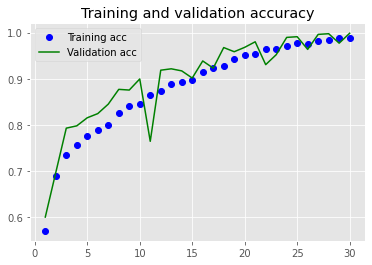

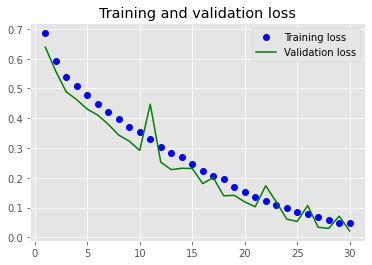

In [14]:
acc = H.history['acc']
val_acc = H.history['val_acc']
loss = H.history['loss']
val_loss = H.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Save the model

In [15]:
model.save("/content/drive/My Drive/cat_dog_cnn_classifier.h5")